In [65]:
import os, random, matplotlib, pickle, yaml, tqdm
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob
from termcolor import colored

SMALL_SIZE, MEDIUM_SIZE = 9, 12

In [18]:
root_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
result_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU/results/round2_legs_antennae_resnet101"

with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])
    
config_path = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

In [27]:
tot_bp, tot_bp_scaled, tot_bp_rotated, tot_body_orientation, tot_angles, tot_rotations, tot_power, tot_embed, tot_loc = [], [], [], [], [], [], [], [], []
for file in tqdm(INFO_values):
    bool_global_file = os.path.exists(f"{root_path}/{file['directory']}/global_location.npy")
    bool_fd_file = file['directory'].split("/")[-1].find("fd") != -1
    if bool_global_file and bool_fd_file:
        print(file['directory'])
        
        tot_bp.append( np.load(f"{root_path}/{file['directory']}/bodypoints.npy") )
        tot_bp_scaled.append( np.load(f"{root_path}/{file['directory']}/scaled_bodypoints.npy") )
        tot_bp_rotated.append( np.load(f"{root_path}/{file['directory']}/rotated_bodypoints.npy") )
        tot_body_orientation.append( np.load(f"{root_path}/{file['directory']}/body_orientation_angles.npy") )
        tot_angles.append( np.load(f"{root_path}/{file['directory']}/angles.npy") )
        tot_power.append( np.load(f"{root_path}/{file['directory']}/power.npy") )
        
        embed_np = np.load(f"{root_path}/{file['directory']}/embeddings.npy") 
        loc_np = np.load(f"{root_path}/{file['directory']}/global_location.npy")
        tot_embed.append( embed_np )
        tot_loc.append( loc_np )
        
        # check if lengths match
        if embed_np.shape[0] - loc_np.shape[0] != 0:
            print(file['directory'])

tot_bp = np.concatenate(tot_bp)
tot_bp_scaled = np.concatenate(tot_bp_scaled)
tot_bp_rotated = np.concatenate(tot_bp_rotated)
tot_body_orientation = np.concatenate(tot_body_orientation)
tot_angles = np.concatenate(tot_angles)
tot_power = np.concatenate(tot_power, axis=2)
tot_embed = np.concatenate(tot_embed)
tot_loc = np.concatenate(tot_loc)

results/round2_legs_antennae_resnet101/01BWmidfd_antmovie200929190558
results/round2_legs_antennae_resnet101/05BOmajfd_antmovie200929205417
results/round2_legs_antennae_resnet101/05YYmajfd_antmovie200924211818
results/round2_legs_antennae_resnet101/03dBmidfd_antmovie200926204012
results/round2_legs_antennae_resnet101/01Bdmidfd_antmovie200926200120
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924205710
results/round2_legs_antennae_resnet101/02RRmajfd_antmovie200924194252
results/round2_legs_antennae_resnet101/03BPmajfd_antmovie200929202854
results/round2_legs_antennae_resnet101/02YRminfd_antmovie200928193903
results/round2_legs_antennae_resnet101/03YBmajfd_antmovie200928200603
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924205307
results/round2_legs_antennae_resnet101/04Ddminfd_antmovie200926205755
results/round2_legs_antennae_resnet101/01Rdmidfd_antmovie200924192056
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924204640
results/round2_legs_

In [33]:
fd_data_obj = {}

for file in tqdm(INFO_values):
    key = file['directory'].split("/")[-1]
    bool_global_file = os.path.exists(f"{root_path}/{file['directory']}/global_location.npy")
    bool_fd_file = key.find("fd") != -1
    if bool_global_file and bool_fd_file:
        print(file['directory'])
        fd_data_obj[key] = {}
        fd_data_obj[key]['loc'] = np.load(f"{root_path}/{file['directory']}/global_location.npy")
        fd_data_obj[key]['embed'] = np.load(f"{root_path}/{file['directory']}/embeddings.npy") 
        

results/round2_legs_antennae_resnet101/01BWmidfd_antmovie200929190558
results/round2_legs_antennae_resnet101/05BOmajfd_antmovie200929205417
results/round2_legs_antennae_resnet101/05YYmajfd_antmovie200924211818
results/round2_legs_antennae_resnet101/03dBmidfd_antmovie200926204012
results/round2_legs_antennae_resnet101/01Bdmidfd_antmovie200926200120
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924205710
results/round2_legs_antennae_resnet101/02RRmajfd_antmovie200924194252
results/round2_legs_antennae_resnet101/03BPmajfd_antmovie200929202854
results/round2_legs_antennae_resnet101/02YRminfd_antmovie200928193903
results/round2_legs_antennae_resnet101/03YBmajfd_antmovie200928200603
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924205307
results/round2_legs_antennae_resnet101/04Ddminfd_antmovie200926205755
results/round2_legs_antennae_resnet101/01Rdmidfd_antmovie200924192056
results/round2_legs_antennae_resnet101/04Ydmidfd_antmovie200924204640
results/round2_legs_

In [106]:
food_loc_center = (45, 20.5)
food_loc_radius = 3.4

<hr>

<hr>

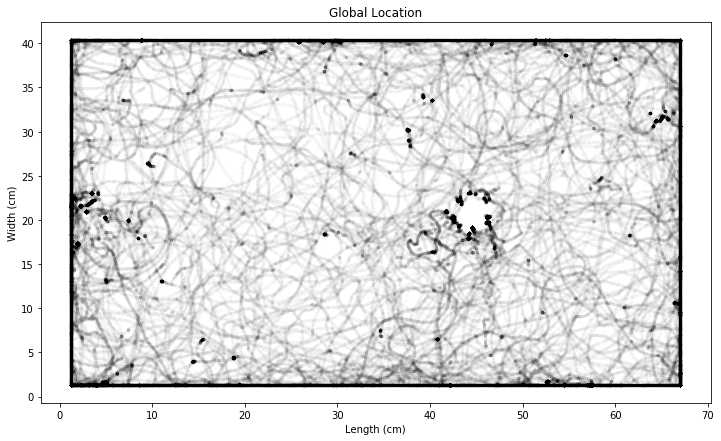

In [41]:
fig_base, ax_base = plt.subplots(figsize=(12,7))
ax_base.scatter(tot_loc[:,0], tot_loc[:,1], s=7, c='k', alpha=0.01)
ax_base.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location")
plt.show()

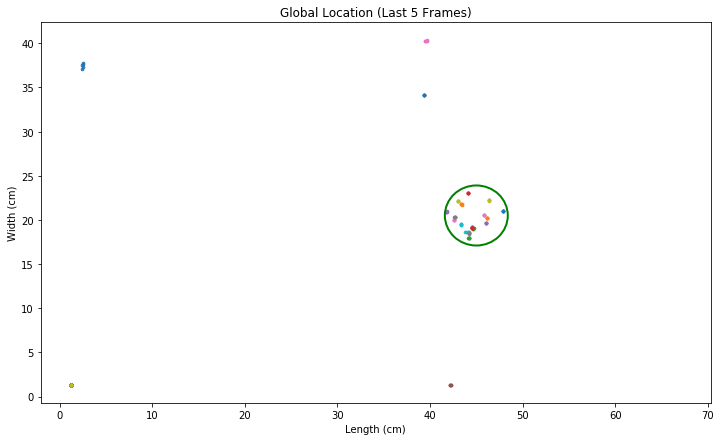

In [110]:
fig, ax = plt.subplots(figsize=(12,7))


# Food Location
food_circle = matplotlib.patches.Circle(food_loc_center,
                         food_loc_radius,
                         linewidth=2,edgecolor='g',facecolor='none')
ax.add_patch(food_circle)

for key, val in fd_data_obj.items():
    ax.scatter(val['loc'][-5:,0], val['loc'][-5:,1], s=7, alpha=0.9)
    
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location (Last 5 Frames)",
      xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
plt.show()

01BWmidfd: False 	 (01BWmidfd_antmovie200929190558)
05BOmajfd: False 	 (05BOmajfd_antmovie200929205417)
05YYmajfd: True
03dBmidfd: True
01Bdmidfd: True
04Ydmidfd: False 	 (04Ydmidfd_antmovie200924205710)
02RRmajfd: False 	 (02RRmajfd_antmovie200924194252)
03BPmajfd: False 	 (03BPmajfd_antmovie200929202854)
02YRminfd: True
03YBmajfd: True
04Ydmidfd: False 	 (04Ydmidfd_antmovie200924205307)
04Ddminfd: True
01Rdmidfd: False 	 (01Rdmidfd_antmovie200924192056)
04Ydmidfd: False 	 (04Ydmidfd_antmovie200924204640)
03PPmajfd: True
04Ydmidfd: False 	 (04Ydmidfd_antmovie200924205857)
02BBmidfd: True
05DDminfd: True
04YWmajfd: True
04Ydmidfd: False 	 (04Ydmidfd_antmovie200924204337)
03dRmajfd: True
05YGminfd: True
04BTmajfd: True
06TTminfd: True
04Tdminfd: True
01Pdminfd: False 	 (01Pdminfd_antmovie200927193143)
02dPmajfd: True
01ROmidfd: True
03BPmajfd: False 	 (03BPmajfd_antmovie200929202743)
06WRmajfd: True
02BGmajfd: False 	 (02BGmajfd_antmovie200929195924)


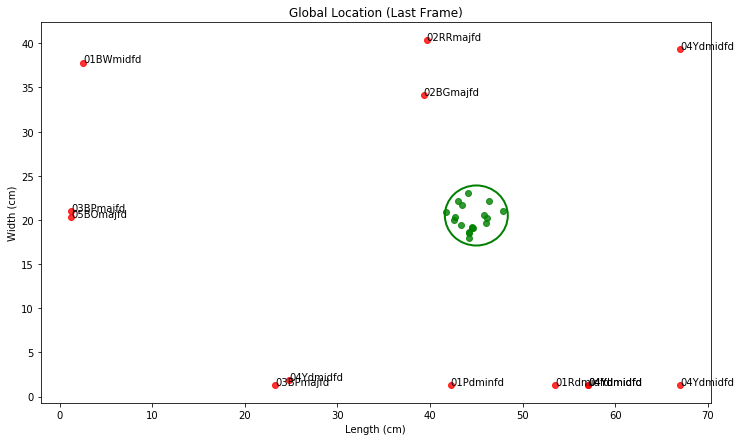

18/31 Reached Food


In [208]:
# food reached parameters
food_loc_xlim = (40,50)
food_loc_ylim = (15,25)
last_fr_buffer = 0

count_reach_food = 0
fig, ax = plt.subplots(figsize=(12,7))

# plot food location
food_circle = matplotlib.patches.Circle(food_loc_center,
                         food_loc_radius,
                         linewidth=2,edgecolor='g',facecolor='none')
ax.add_patch(food_circle)

# store list
success_list = []
fail_list = []

for key, val in fd_data_obj.items():
    (fr_idx, dim_idx) = np.where(val['loc'] != 1.25)
    last_fr_idx = np.max(fr_idx)
    start_fr_idx = last_fr_idx - last_fr_buffer
    # confirm if reached food
    bool_xlim = (val['loc'][start_fr_idx:last_fr_idx+1,0] > food_loc_xlim[0]) & (val['loc'][start_fr_idx:last_fr_idx+1,0] < food_loc_xlim[1])
    bool_ylim = (val['loc'][start_fr_idx:last_fr_idx+1,1] > food_loc_ylim[0]) & (val['loc'][start_fr_idx:last_fr_idx+1,1] < food_loc_ylim[1])
    bool_xylim = bool_xlim & bool_ylim
    bool_reach_food = bool_xylim.any()
    
    # plot figures
    bool_color = ['g' if i else 'r' for i in bool_xylim]
    ax.scatter(val['loc'][start_fr_idx:last_fr_idx+1,0], val['loc'][start_fr_idx:last_fr_idx+1,1], c=bool_color, alpha=0.8)
    
    # output
    if bool_reach_food:
        print(f"{key.split('_')[0]}: {colored(bool_reach_food, 'green')}")
        count_reach_food += 1
        success_list.append(key)
    else:
        print(f"{key.split('_')[0]}: {colored(bool_reach_food, 'red')} \t ({key})")       
        ax.annotate( key.split('_')[0], (val['loc'][last_fr_idx,0], val['loc'][last_fr_idx,1]) )
        fail_list.append(key)
        
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location (Last Frame)",
xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
plt.show()

# summary
print(f"{count_reach_food}/{len(fd_data_obj)} Reached Food")

In [195]:

fd_data_obj["04Ydmidfd_antmovie200924205710"]['loc'][np.max(fr_idx)]


array([1.25, 1.25])

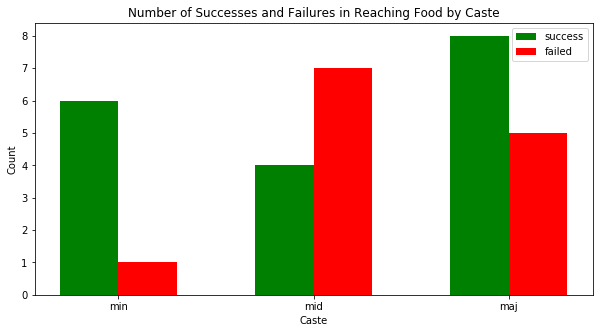

In [147]:
from collections import Counter

success_caste_list = [key[4:7] for key in success_list]
fail_caste_list = [key[4:7] for key in fail_list]

success_caste_list.count("min")
success_caste_list.count("mid")
success_caste_list.count("maj")

ind = np.arange(3)
width = 0.3

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(ind, (success_caste_list.count("min"), success_caste_list.count("mid"), success_caste_list.count("maj")), width, label="success", color='g')
ax.bar(ind+width, (fail_caste_list.count("min"), fail_caste_list.count("mid"), fail_caste_list.count("maj")), width, label="failed", color='r')

ax.set(title="Number of Successes and Failures in Reaching Food by Caste", xlabel="Caste", ylabel="Count")
plt.xticks(ind + width / 2, ('min', 'mid', 'maj'))
plt.legend(loc="best")
plt.show()

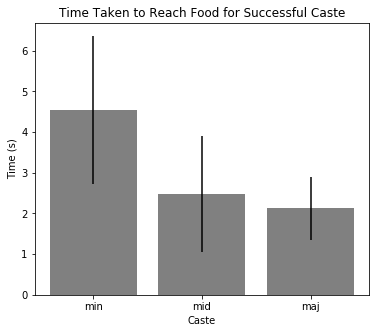

In [180]:
min_time, mid_time, maj_time = [], [], []
for key in success_list:
    if key.find("min") != -1:
        min_time.append( len(fd_data_obj[key]['loc'])/(config['fps']*60) )
    elif key.find("mid") != -1:
        mid_time.append( len(fd_data_obj[key]['loc'])/(config['fps']*60) )
    elif key.find("maj") != -1:
        maj_time.append( len(fd_data_obj[key]['loc'])/(config['fps']*60) )

# Figure
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(('min', 'mid', 'maj'), (np.mean(min_time), np.mean(mid_time), np.mean(maj_time)), 
       yerr=(np.std(min_time), np.std(mid_time), np.std(maj_time))/np.sqrt(3), 
       color='gray')

ax.set(title="Time Taken to Reach Food for Successful Caste", xlabel="Caste", ylabel="Time (s)")
plt.show()

In [242]:
def arg_closest(data):
    diff = data-np.array(food_loc_center)[np.newaxis, :]
    dist = np.sqrt(np.sum(diff**2, axis=1))
    closest_fr_idx = np.argmin(dist)
    return data[closest_fr_idx].tolist()

success_closest_fr = np.array([arg_closest(fd_data_obj[key]['loc']) for key in success_list])
fail_closest_fr = np.array([arg_closest(fd_data_obj[key]['loc']) for key in fail_list])


print(fail_closest_fr)

    

[[46.67428572 19.91047618]
 [49.69569892 23.44516128]
 [45.0124031   1.25      ]
 [44.82170543 22.85116278]
 [46.275      19.05151515]
 [47.12177578 20.98393513]
 [44.98294573 18.61705427]
 [51.45897437  1.25      ]
 [45.34202898 22.3768116 ]
 [61.16       24.00533333]
 [44.25789473 23.94298245]
 [14.70781893 40.41666667]
 [45.98275862 18.99252873]]


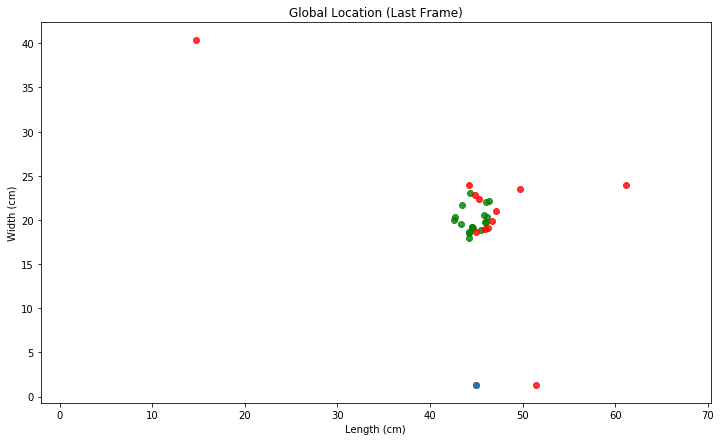

In [252]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(success_closest_fr[:,0], success_closest_fr[:,1], c='g', alpha=0.8)
ax.scatter(fail_closest_fr[:,0], fail_closest_fr[:,1], c='r', alpha=0.8)


ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location (Last Frame)",
xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
plt.show()
  
# ax.annotate( key.split('_')[0], (val['loc'][last_fr_idx,0], val['loc'][last_fr_idx,1]) )

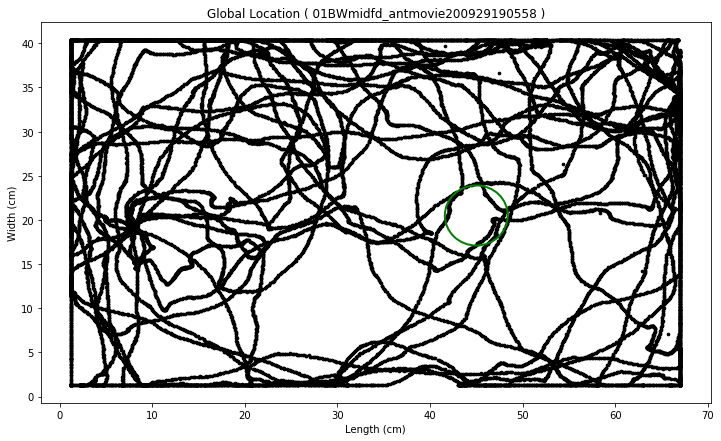

In [275]:
key_i = "01BWmidfd_antmovie200929190558"

fig, ax = plt.subplots(figsize=(12,7))
# plot food location
food_circle = matplotlib.patches.Circle(food_loc_center,
                         food_loc_radius,
                         linewidth=2,edgecolor='g',facecolor='none')
ax.add_patch(food_circle)
ax.scatter(fd_data_obj[key_i]['loc'][:,0], fd_data_obj[key_i]['loc'][:,1], s=7, c='k', alpha=1)
ax.set(xlabel='Length (cm)', ylabel='Width (cm)', title=f"Global Location ( {key_i} )",xlim=ax_base.get_xlim(), ylim=ax_base.get_ylim())
plt.show()

In [249]:
fail_closest_fr

array([[46.67428572, 19.91047618],
       [49.69569892, 23.44516128],
       [45.0124031 ,  1.25      ],
       [44.82170543, 22.85116278],
       [46.275     , 19.05151515],
       [47.12177578, 20.98393513],
       [44.98294573, 18.61705427],
       [51.45897437,  1.25      ],
       [45.34202898, 22.3768116 ],
       [61.16      , 24.00533333],
       [44.25789473, 23.94298245],
       [14.70781893, 40.41666667],
       [45.98275862, 18.99252873]])

In [258]:
fail_closest_fr[np.array(fail_list) == '04Ydmidfd_antmovie200924205307']

array([[47.12177578, 20.98393513]])